# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Overview

I will be using the TMDb movie dataset in this project.

The dataset contains data of about 10866 movies. This dataset collected from The Movie Database (TMDb). It consist of 21 columns.

#### Questions

1- Which year had the most number of profitable movies ?

2- Are movie budgets increase by time ?

3- What is the average runtime for all movies ? 

4- Is movies runtime increase by time ? 

5- what is the highest profit achieved by a movie ? 

6- What is the most profits by genre in the dataset ?

7- Who is the most starring actor in the dataset ? 

In [25]:
# Importing required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> In data wrangling I will use some commands with the help of pandas to explore data and get familiar with the attributes 

### General Properties

### Loading the dataset

In [26]:
# Read the dataset in a dataframe
movies = pd.read_csv('tmdb-movies.csv')

# Reading the first few rows of the dataset 
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [27]:
# Checking the data shape 
movies.shape

(10866, 21)

In [28]:
# checking the data and null values 
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [29]:
# checking attributes types to see if there are data types need to be converted 
movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [30]:
# check for duplicate values
sum(movies.duplicated())

1

### Checking relations between variables 

<AxesSubplot:>

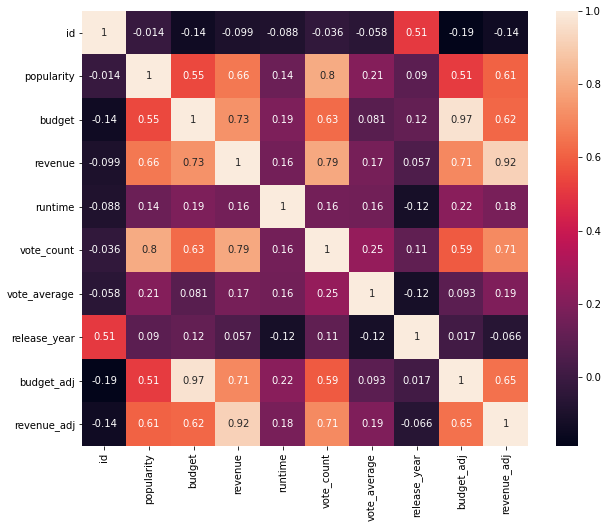

In [36]:
# Using the correlation matrix to check relations between variables
plt.figure(figsize=(10, 8))
sns.heatmap(movies.corr(), annot=True)

### Data Cleaning ( Handling unused and missing values )

* Drop duplicate rows to avoid unaccurate results.
* Remove unnecessary columns such as 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', production_company, 'keywords', 'overview', 'production_companies', 'vote_count' and 'vote_average'.
* Removing zero values from revenue and budget columns. 
* Replace zero with the average runtime in the runtime column. 
* Change data type of columns revenue and budget from float to int64. 

### Removing the unnecessary attributes

In [37]:
# Dropping the unnecessary attributes 
unused_cols = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director','overview', 'production_companies', 'vote_count', 'vote_average']
movies.drop(unused_cols, axis = 1, inplace = True)

In [38]:
# Print the first few rows to be sure that columns have been dropped successfully 
movies.head()

,budget,revenue,original_title,cast,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


### Removing duplicate values 

In [39]:
movies.drop_duplicates(inplace=True)

In [40]:
# Check data after dropping duplicates 
movies.shape

(10865, 9)

### Replacing zero values with NAN 

In [41]:
# After some exploration there are some values of zero in these columns so I will change them no Nan and then drop them 
movies['runtime'] = movies['runtime'].replace(0, np.NAN)
movies['budget'] = movies['budget'].replace(0, np.NAN)
movies['revenue'] = movies['revenue'].replace(0, np.NAN)

In [42]:
# Dropping the null values from budget and revenue columns and replace with the mean in the runtime column 
movies['runtime'].fillna(movies['runtime'].mean())
movies.dropna(inplace = True)

In [43]:
# check again that all the null values are dropped
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3572 non-null   float64
 1   revenue         3572 non-null   float64
 2   original_title  3572 non-null   object 
 3   cast            3572 non-null   object 
 4   tagline         3572 non-null   object 
 5   runtime         3572 non-null   float64
 6   genres          3572 non-null   object 
 7   release_date    3572 non-null   object 
 8   release_year    3572 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 279.1+ KB


### Changing the data types of budget and revenue columns to int

In [44]:
movies['budget'] = movies['budget'].apply(np.int64)
movies['revenue'] = movies['revenue'].apply(np.int64)

In [45]:
movies.head()

,budget,revenue,original_title,cast,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Vengeance Hits Home,137.0,Action|Crime|Thriller,4/1/15,2015


<a id='eda'></a>
## Exploratory Data Analysis

### ًWhich year had the most number of profitable movies ? 

In [46]:
# Adding a new column contatining net profit for every movie 
movies['profit'] = movies['revenue'] - movies['budget']

In [47]:
# check that profit column was added successfully 
movies.head()

,budget,revenue,original_title,cast,tagline,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,3/18/15,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Vengeance Hits Home,137.0,Action|Crime|Thriller,4/1/15,2015,1316249360


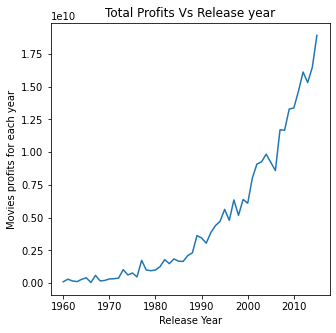

In [48]:
# check each year profit 
profits_per_year = movies.groupby('release_year')['profit'].sum()

#creating figsize
plt.figure(figsize=(5,5))

#on x-axis
plt.xlabel('Release Year')
#on y-axis
plt.ylabel('Movies profits for each year')
#title of the plot
plt.title('Total Profits Vs Release year')
plt.plot(profits_per_year)
plt.show()

##### The plot above shows that profits achieved by movies increase by time. 

### Are movie budgets increase by time ?

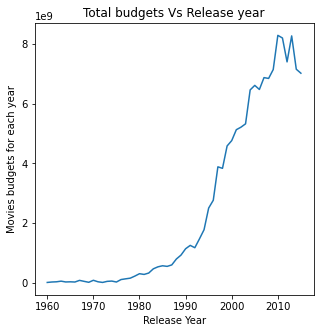

In [49]:
# check each year budget 
budgets_per_year = movies.groupby('release_year')['budget'].sum()

#creating figsize
plt.figure(figsize=(5,5))

#on x-axis
plt.xlabel('Release Year')
#on y-axis
plt.ylabel('Movies budgets for each year')
#title of the plot
plt.title('Total budgets Vs Release year')
plt.plot(budgets_per_year)
plt.show()

##### The plot above shows that movies budgets increase by time.  

### What is the average runtime for all movies ? 

In [50]:
# check the average for the total movies runtime 
movies['runtime'].mean()

109.12290033594626

### Is movies runtime increase by time ? 

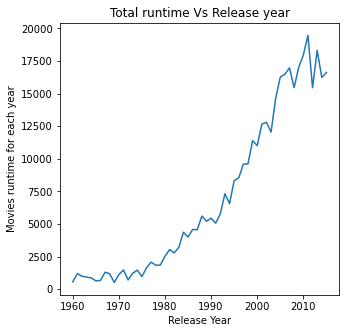

In [51]:
# check total runtime per year 
runtime_per_year = movies.groupby('release_year')['runtime'].sum()

#creating figsize
plt.figure(figsize=(5,5))

#on x-axis
plt.xlabel('Release Year')
#on y-axis
plt.ylabel('Movies runtime for each year')
#title of the plot
plt.title('Total runtime Vs Release year')
plt.plot(runtime_per_year)
plt.show()

##### The plot above shows that movies runtime increase over the years. 

### Plotting a histogram of movies runtime 

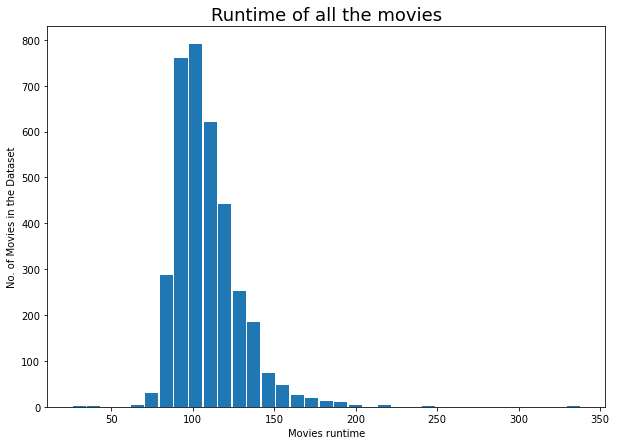

In [52]:
#creating the figure size
plt.figure(figsize=(10,7))

# Set x-axis title
plt.xlabel('Movies runtime')
# Set y-axis title 
plt.ylabel('No. of Movies in the Dataset')
# Set title to the graph
plt.title('Runtime of all the movies', fontsize=18)

# Plotting a histogram
plt.hist(movies['runtime'], rwidth = 0.9, bins =35)
plt.show()

###  Check the highest profit by a movie in the dataset

In [53]:
# group by movie name and order by profits in descending order 
print(movies.groupby('original_title')['profit'].sum().sort_values(ascending = False))

original_title
Avatar                          2544505847
Star Wars: The Force Awakens    1868178225
Titanic                         1645034188
Jurassic World                  1363528810
Furious 7                       1316249360
                                   ...    
Brother Bear                     -99999750
Mars Needs Moms                 -111007242
The Alamo                       -119180039
The Lone Ranger                 -165710090
The Warrior's Way               -413912431
Name: profit, Length: 3528, dtype: int64


##### The highest profit achieved by Avatar

### What is the most profits achieved by genre in the dataset ?

In [54]:
# subset the dataset to select movies that achieved more than 100 million dollars profits
most_profits = movies[movies['profit'] >= 100000000]

In [55]:
# Seperate each genre and store it in a new variable
def seperate(col):
    '''
    seperate function will help us access each value in certain columns in the dataset.
    '''
    sep = most_profits[col].str.cat(sep = '|')
    sep = pd.Series(sep.split('|'))
    # arrange in descending order 
    sep_ordered = sep.value_counts(ascending = False)
    
    return sep_ordered

# call the function and store it in a variable 
sep_ordered = seperate('genres')

# check the dataset after amendement 
sep_ordered.head()

Action       315
Comedy       295
Adventure    275
Drama        257
Thriller     231
dtype: int64

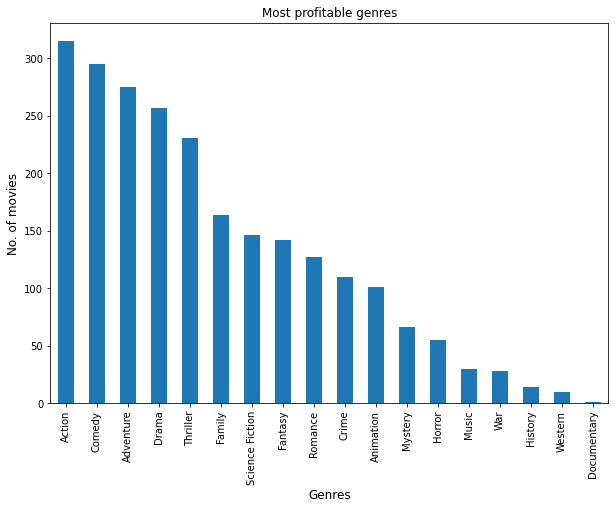

In [56]:
# plotting the sep_ordered 
fig = sep_ordered.plot(kind='bar')

# set the title
fig.set(title = 'Most profitable genres')

# set name for x axis
fig.set_xlabel('Genres', fontsize = 12)

# Set name for y axis
fig.set_ylabel('No. of movies', fontsize = 12)

# figure size
fig.figure.set_size_inches(10, 7)
plt.show()

##### The plot above shows that Action genre achieved the highest profits. 

### Who is the most starring actor in the dataset ? 

In [57]:
# Call the function seperate again and store the result in a new variable 
famous_actors = seperate('cast')
famous_actors.head()

Tom Cruise      23
Tom Hanks       19
Brad Pitt       18
Adam Sandler    17
Cameron Diaz    16
dtype: int64

In [58]:
# Extracting the top 10 starring actors
top_10 = famous_actors.iloc[:10]

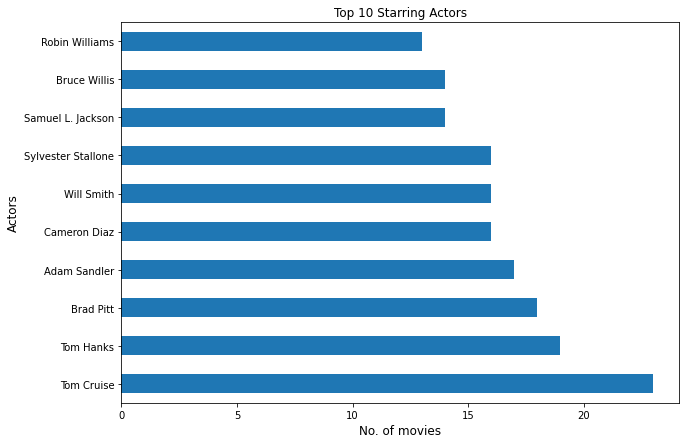

In [59]:
# plotting the top_10  
fig = top_10.plot(kind='barh')

# set the title
fig.set(title = 'Top 10 Starring Actors')

# set name for x axis
fig.set_xlabel('No. of movies', fontsize = 12)

# Set name for y axis
fig.set_ylabel('Actors', fontsize = 12)

# figure size
fig.figure.set_size_inches(10, 7)
plt.show()

##### The plot above shows that Tom Cruise is the most starring actor in the dataset. 

<a id='conclusions'></a>
## Conclusions

* With the help of the plots we can see that profits increase by time.

* By the time movies budgets are increasing also. 

* The average of runtime for all movies is 109 minutes which is 1 hour and 49 minutes.

* Movies runtime also increases by the time. 

* The movie that achieved the highest profit is Avatar.

* Action genre has the most profits. 

* Tom Cruise is the most starring actor in the dataset among all ctors. 

* Fun fact: Cameron Diaz is the only actress in the top 10 

### Limitations

* There are columns that contain many values like genres and cast. 

* There are a lot of columns in the dataset that needed to be checked to decide which columns had to be dropped and which columns were important to keep for my analysis. 

* The nature of the dataset controlled how I explored the data as there are columns that have weight and important for the analysis. 